## Brendan Harding, March 2019.

This notebook more or less reproduces the plots from the article:
B. Harding, Symmetric Itinerary Sets: Algorithms and Nonlinear Examples, Bull. Aust. Math. Soc., (2019).
(DOI: 10.1017/S0004972719000297)

It also serves as a tutorial for the use of the DynamicalSystem class and fractalTransformation* functions.

Note: there is a slight difference in the peppers filter image produced here which can essentially be attributed to rounding errors (since the more general dynamcalSystem class and transformation functions provided here differ slightly from the original implementation, and in hindsight the axis ordering for the image in the paper may be backwards).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from DynamicalSystem import DynamicalSystem,fractalTransformation,fractalTransformationCG
# The following 3 lines are used since I upgraded my matplotlib version
import matplotlib.style
import matplotlib as mpl
mpl.style.use('classic')
# The following 3 lines are settings I typically use for 'production' plots
from matplotlib import rc
rc('text', usetex=True)
rc('font', size=8)

### Affine example

/Users/brendanharding/Library/Python/2.7/lib/python/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


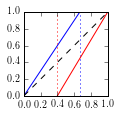

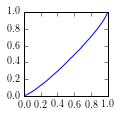

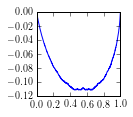

In [2]:
save_plots = False
#
f0 = lambda x:1.5*x
f1 = lambda x:(5.0*x-2.0)/3.0
F_A = DynamicalSystem(f0,f1)
#
# Note: the class automatically defines inverses using a root solver, 
#       but, when an exact form of the inverse is known, we can 
#       'patch' the methods for increased efficiency/accuracy.
F_A.if0 = lambda x:x/1.5
F_A.if1 = lambda x:0.6*x+0.4
#
plt.figure(figsize=(1.5,1.5))
plt.axes().set_aspect(1.0)
F_A.plot(include_rho=False,show=False)
if save_plots:
    plt.savefig("affine_mappings.eps", \
                bbox_inches='tight',pad_inches=0.05,format='eps',dpi=1200)
plt.show()
#
F_A.set_symmetric_rho()
F_Asym = F_A.get_symmetric_system()
#
# Note: the class automatically defines inverses using a root solver, 
#       but, when an exact form of the inverse is known, we can 
#       'patch' the methods for increased efficiency/accuracy.
F_Asym.if0 = lambda x:0.6*x       # f0=5*x/3
F_Asym.if1 = lambda x:(x+0.5)/1.5 # f1=-0.5+1.5*x
#
x,h = fractalTransformationCG(F_A,F_Asym,M=1024,N=50,its=20)
#
plt.figure(figsize=(1.5,1.5))
plt.axes().set_aspect(1.0)
plt.xlim(0.0,1.0)
plt.ylim(0.0,1.0)
plt.plot(x,h)
if save_plots:
    plt.savefig("affine_homeomorphism.eps", \
                bbox_inches='tight',pad_inches=0.05,format='eps',dpi=1200)
plt.show()
#
plt.figure(figsize=(1.5,1.5))
plt.xlim(0.0,1.0)
plt.plot(x,h-x)
if save_plots:
    plt.savefig("affine_homeomorphism_minus_x.eps", \
                bbox_inches='tight',pad_inches=0.05,format='eps',dpi=1200)
plt.show()

### Quadratic example

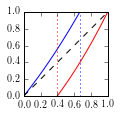

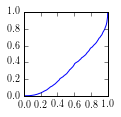

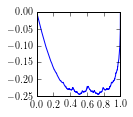

In [3]:
save_plots = False
#
f0 = lambda x:1.25*x+0.375*x**2
f1 = lambda x:(-4.0+8.0*x+5.0*x**2)/9.0
F_Q = DynamicalSystem(f0,f1)
#
# Note: the class automatically defines inverses using a root solver, 
#       but, when an exact form of the inverse is known, we can 
#       'patch' the methods for increased efficiency/accuracy.
F_Q.if0 = lambda x:(-1.25+(1.5625+1.5*x)**0.5)/0.75
F_Q.if1 = lambda x:-0.8+(1.44+1.80*x)**0.5
#
plt.figure(figsize=(1.5,1.5))
plt.axes().set_aspect(1.0)
F_Q.plot(include_rho=False,show=False)
if save_plots:
    plt.savefig("quadratic_mappings.eps", \
                bbox_inches='tight',pad_inches=0.05,format='eps',dpi=1200)
plt.show()
#
F_Q.set_symmetric_rho()
F_Qsym = F_Q.get_symmetric_system()
#
# Note: the class automatically defines inverses using a root solver, 
#       but, when an exact form of the inverse is known, we can 
#       'patch' the methods for increased efficiency/accuracy.
F_Qsym.if0 = lambda x:1.8*(1.0-(1.0-5.0*x/9.0)**0.5) # f0=2x-5x^2/9
F_Qsym.if1 = lambda x:(2.0-(3.0625-1.5*x)**0.5)/0.75 # f1=-0.625+2x-0.375x^2
#
x,h = fractalTransformationCG(F_Q,F_Qsym,M=1024,N=50,its=20)
#
plt.figure(figsize=(1.5,1.5))
plt.axes().set_aspect(1.0)
plt.xlim(0.0,1.0)
plt.ylim(0.0,1.0)
plt.plot(x,h)
if save_plots:
    plt.savefig("quadratic_homeomorphism.eps", \
                bbox_inches='tight',pad_inches=0.05,format='eps',dpi=1200)
plt.show()
#
plt.figure(figsize=(1.5,1.5))
plt.xlim(0.0,1.0)
plt.plot(x,h-x)
if save_plots:
    plt.savefig("quadratic_homeomorphism_minus_x.eps", \
                bbox_inches='tight',pad_inches=0.05,format='eps',dpi=1200)
plt.show()

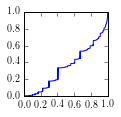

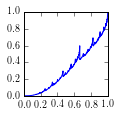

In [4]:
save_plots = False
#
rho_Q = F_Q.rho
F_Q.set_rho(F_Q.rho_min)
x,h = fractalTransformationCG(F_Q,F_Qsym,M=1024,N=50,its=20)
#
plt.figure(figsize=(1.5,1.5))
plt.axes().set_aspect(1.0)
plt.xlim(0.0,1.0)
plt.ylim(0.0,1.0)
plt.plot(x,h)
#plt.scatter(x,h,s=1,marker=',')
if save_plots:
    plt.savefig("quadratic_homeomorphism_L.eps", \
                bbox_inches='tight',pad_inches=0.05,format='eps',dpi=1200)
plt.show()
#
F_Q.set_rho(F_Q.rho_max)
x,h = fractalTransformationCG(F_Q,F_Qsym,M=1024,N=50,its=20)
#
plt.figure(figsize=(1.5,1.5))
plt.axes().set_aspect(1.0)
plt.xlim(0.0,1.0)
plt.ylim(0.0,1.0)
plt.plot(x,h)
#plt.scatter(x,h,s=1,marker=',')
if save_plots:
    plt.savefig("quadratic_homeomorphism_R.eps", \
                bbox_inches='tight',pad_inches=0.05,format='eps',dpi=1200)
plt.show()
#
F_Q.rho = rho_Q

### Non-linear example

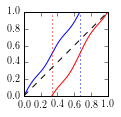

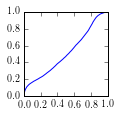

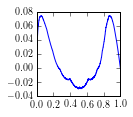

In [5]:
# Here's some examples of some much more 'wiggly' maps
f0 = lambda x:1.5*x+np.sin(6.0*np.pi*x)/(15.0*np.pi)
f1 = lambda x:(-0.5-2.0/(9.0*np.pi))+(1.5+1.0/(3.0*np.pi))*x-np.cos(4.5*np.pi*(1.0-x))/(9.0*np.pi)
F_N = DynamicalSystem(f0,f1)
#
plt.figure(figsize=(1.5,1.5))
plt.axes().set_aspect(1.0)
F_N.plot(include_rho=False,show=False)
if save_plots:
    plt.savefig("nonlinear_mappings.eps", \
                bbox_inches='tight',pad_inches=0.05,format='eps',dpi=1200)
plt.show()
#
F_N.set_symmetric_rho()
F_Nsym = F_N.get_symmetric_system()
F_Nsym.check_validity()
x,h = fractalTransformationCG(F_N,F_Nsym,M=1024,N=50,its=20)
#
plt.figure(figsize=(1.5,1.5))
plt.axes().set_aspect(1.0)
plt.xlim(0.0,1.0)
plt.ylim(0.0,1.0)
plt.plot(x,h)
if save_plots:
    plt.savefig("nonlinear_homeomorphism.eps", \
                bbox_inches='tight',pad_inches=0.05,format='eps',dpi=1200)
plt.show()
#
plt.figure(figsize=(1.5,1.5))
plt.xlim(0.0,1.0)
plt.plot(x,h-x)
if save_plots:
    plt.savefig("nonlinear_homeomorphism_minus_x.eps", \
                bbox_inches='tight',pad_inches=0.05,format='eps',dpi=1200)
plt.show()

### Image fltering examples

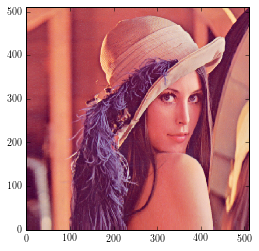

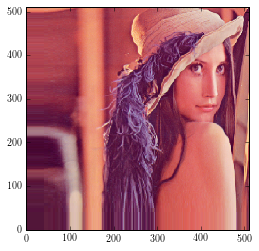

In [6]:
save_plots = False
#
img = plt.imread('Lena.png')
assert img.shape[0]==img.shape[1]
img[:,:,:] = img[::-1,:,:] # fix orientation of vertical component
#
#xa,ha = fractalTransformation(F_A,F_Asym,M=img.shape[0]-1,N=50)
xa,ha = fractalTransformationCG(F_A,F_Asym,M=img.shape[0]-1,N=50,its=20)
TX,TY = np.meshgrid(np.array(0.5+ha*(img.shape[0]-1),np.int),
                    np.array(0.5+ha*(img.shape[0]-1),np.int),indexing='ij')
transformed_img = img[TX,TY,:]
plt.imshow(transformed_img,origin='lower')
plt.show()
if save_plots:
    plt.imsave('figures/affine_transformed_Lena.png',transformed_img[::-1,:,:]) # note the axis fix
#
#xq,hq = fractalTransformation(F_Q,F_Qsym,M=img.shape[0]-1,N=50)
xq,hq = fractalTransformationCG(F_Q,F_Qsym,M=img.shape[0]-1,N=50,its=20)
TX,TY = np.meshgrid(np.array(0.5+hq*(img.shape[0]-1),np.int),
                    np.array(0.5+hq*(img.shape[0]-1),np.int),indexing='ij')
transformed_img = img[TX,TY,:]
plt.imshow(transformed_img,origin='lower')
plt.show()
if save_plots:
    plt.imsave('figures/quadratic_transformed_Lena.png',transformed_img[::-1,:,:]) # note the axis fix

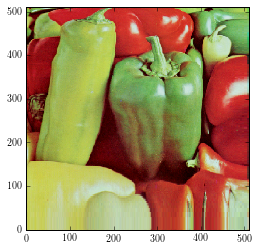

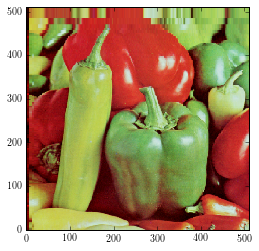

In [7]:
save_plots = False
#
img = plt.imread('peppers.png')
img[:,:,:] = img[::-1,:,:] # fix orientation of vertical component
#
xq,hq = fractalTransformationCG(F_Q,F_Qsym,M=img.shape[0]-1,N=20,its=20)
xn,hn = fractalTransformationCG(F_N,F_Nsym,M=img.shape[1]-1,N=20,its=20)
#xq,hq = fractalTransformation(F_Q,F_Qsym,M=img.shape[0]-1,N=20)
#xn,hn = fractalTransformation(F_N,F_Nsym,M=img.shape[1]-1,N=20)
TX,TY = np.meshgrid(np.array(0.5+hq*(img.shape[0]-1),np.int),
                    np.array(0.5+hn*(img.shape[1]-1),np.int),indexing='ij')
transformed_pepper = img[TX,TY,:]
plt.imshow(transformed_pepper,origin='lower')
plt.show()
if save_plots:
    plt.imsave('figures/transformed_peppers.png',transformed_pepper[::-1,:,:]) # note the axis fix
#
#xq,hqi = fractalTransformation(F_Qsym,F_Q,M=img.shape[0]-1,N=20)
#xn,hni = fractalTransformation(F_Nsym,F_N,M=img.shape[1]-1,N=20)
xq,hqi = fractalTransformationCG(F_Qsym,F_Q,M=img.shape[0]-1,N=20,its=20)
xn,hni = fractalTransformationCG(F_Nsym,F_N,M=img.shape[1]-1,N=20,its=20)
ITX,ITY = np.meshgrid(np.array(0.5+hqi*(img.shape[0]-1),np.int),
                      np.array(0.5+hni*(img.shape[1]-1),np.int),indexing='ij')
filtered_pepper = transformed_pepper[ITX,ITY,:]
plt.imshow(filtered_pepper,origin='lower')
plt.show()
if save_plots:
    plt.imsave('figures/filtered_peppers.png',filtered_pepper[::-1,:,:]) # note the axis fix